 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [157]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [158]:
# Reading whale returns

aapl_csv = Path("Resources/aapl_historical.csv")
algo_returns_csv = Path("Resources/algo_returns.csv")
cost_historical_csv = Path("Resources/cost_historical.csv")
goog_historical_csv = Path("Resources/goog_historical.csv")
sp500_history_csv = Path("Resources/sp500_history.csv")
whale_csv = Path("Resources/whale_returns.csv")


# YOUR CODE HERE
whale_df = pd.read_csv(whale_csv, index_col="Date", 
                       parse_dates=True, infer_datetime_format=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [159]:
# Count nulls

whale_df.isnull().sum()

# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [160]:
# Drop nulls
# YOUR CODE HERE

whale_df = whale_df.dropna()
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [161]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_returns_csv,index_col="Date", 
                      parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [162]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [163]:
# Drop nulls

algo_df = algo_df.dropna()
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [164]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", 
                       parse_dates=True, infer_datetime_format=True)

In [165]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [166]:
# Fix Data Types

close = sp500_df.Close.str.replace("$","").astype(float)
close.head

<bound method NDFrame.head of Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64>

In [167]:
# Calculate Daily Returns

sp500_returns = close.pct_change()

sp500_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [168]:
# Drop nulls
sp500_returns.dropna
sp500_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [169]:
# Rename Column

sp500_returns.columns = ['S&P 500']
sp500_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [170]:
# Concatenate all DataFrames into a single DataFrame

combined_returns = pd.concat([whale_df,algo_df,sp500_returns],axis="columns",join="inner")

combined_returns_sorted = combined_returns.sort_index(inplace=True)
combined_returns_sorted = combined_returns.dropna()

combined_returns.head(-1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

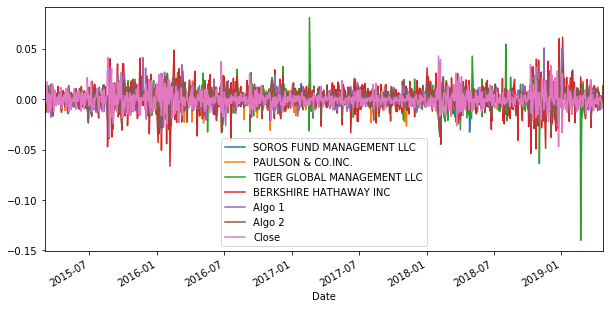

In [171]:
# Plot daily returns
combined_returns.plot(figsize=(10,5))

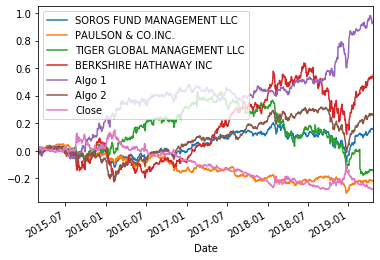

In [172]:
# Plot cumulative returns

cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.plot()


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

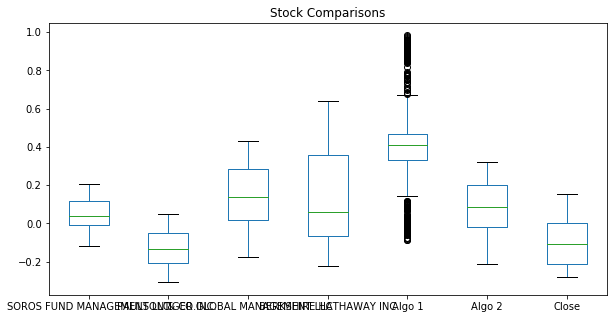

In [173]:
# Box plot to visually show risk

cumulative_returns.plot.box(figsize=(10,5),title="Stock Comparisons")

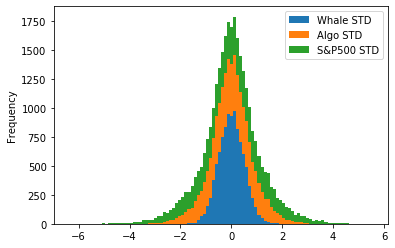

In [195]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
whale_df_std = np.random.normal(scale=0.5, size=10000)
algo_df_std = np.random.normal(scale=1.0, size=10000)
sp500_df_std = np.random.normal(scale=1.5, size=10000)

combined_std = pd.DataFrame({
    "Whale STD": whale_df_std,
    "Algo STD": algo_df_std,
    "S&P500 STD": sp500_df_std
})

combined_std.plot.hist(stacked=True, bins=100)

In [175]:
# Determine which portfolios are riskier than the S&P 500

sp500_std = sp500_returns.std()
cumulative_returns.ascending=True

cumulative_returns.head()
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123


##### Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

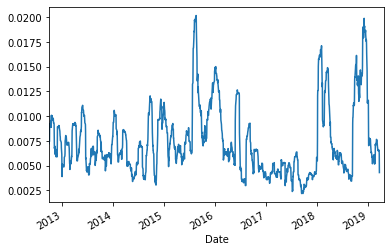

In [176]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_returns.rolling(window=21).std().plot()

In [184]:
# Correlation

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


In [185]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [186]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [187]:
# Annualzied Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns * np.sqrt(252))
sharpe_ratios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-625.061552,395.102594,-4740.139882,-385.751106,-3179.478450,-1453.712043,-358.074609
2015-03-04,822.622745,1121.018651,-775.659155,-1063.166841,-587.293046,942.530961,-492.010648
2015-03-05,158.793256,-850.573960,-3450.563756,585.598962,-538.860937,238.227923,-89.516672
2015-03-06,-266.939715,1550.943190,-256.537774,-287.034437,-377.460156,-240.768048,-115.768743
2015-03-09,-331.979613,-666.771020,-697.645004,-242.113639,-284.335116,-311.079478,-50.713233


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(10,5),kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [196]:
# Read the first stock
fb_csv = "../Whales_Returns_Assignment/fb_csv - FB.csv"

fb_df = pd.read_csv(fb_csv, index_col="Date", 
                       parse_dates=True, infer_datetime_format=True)
fb_df.head()

FileNotFoundError: [Errno 2] File b'../Whales_Returns_Assignment/fb_csv - FB.csv' does not exist: b'../Whales_Returns_Assignment/fb_csv - FB.csv'

In [155]:
# Read the second stock
msft_csv = Path("Users/selprince.AGCO/Desktop/Columbia_Bootcamp_Repository/Whales_Returns_Assignment/msft_csv - MSFT.csv")

msft_df = pd.read_csv(fb_csv, index_col="Date", 
                       parse_dates=True, infer_datetime_format=True)
msft_df.head()

FileNotFoundError: [Errno 2] File b'Users\\selprince.AGCO\\Desktop\\Columbia_Bootcamp_Repository\\Whales_Returns_Assignment\\fb_csv - FB.csv' does not exist: b'Users\\selprince.AGCO\\Desktop\\Columbia_Bootcamp_Repository\\Whales_Returns_Assignment\\fb_csv - FB.csv'

In [ ]:
# Read the third stock
amzn_csv = Path("Users/selprince.AGCO/Desktop/Columbia_Bootcamp_Repository/Whales_Returns_Assignment/amzn_csv - AMZN.csv")

amzn_df = pd.read_csv(fb_csv, index_col="Date", 
                       parse_dates=True, infer_datetime_format=True)
amzn_df.head()

In [ ]:
# Concatenate all stocks into a single DataFrame
my_stock_portfolio = pd.concat([fb_df,msft_df,amzn_df,], 
                            axis="columns", join="inner")
my_stock_portfolio.head()

In [ ]:
# Reset the index
my_stock_portfolio.sort_index(inplace=True)

In [ ]:
# Drop Nulls
my_stock_portfolio.dropna
my_stock_portfolio.head()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [190]:
# Calculate weighted portfolio returns
all_prices = pd.concat([my_stock_portfolio, sp500_df, algo_df], axis="rows", join="inner")
all_prices = all_prices.reset_index()
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

weights = [1/3, 1/3, 1/3]
my_stock_portfolio = 1/3
sp500_returns = 1/3
algo_df = 1/3 

    portfolio_returns = my_stock_portfolio * all_returns["My Portfolio"] + 
                        sp500_returns * all_returns["S&P500"] + 
                        my_stock_portfolio * all_returns["My Portfolio"]

        portfolio_returns.head()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# YOUR CODE HERE

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
# YOUR CODE HERE

In [42]:
# Rolling
# YOUR CODE HERE

In [43]:
# Beta
# YOUR CODE HERE

In [44]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [45]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [46]:
# YOUR CODE HERE